# 01. Data Exploration & Visualization

**Mục tiêu**: Khám phá dữ liệu, phân tích EDA, và tạo visualizations để justify các quyết định tiền xử lý.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Thư viện đã được tải thành công!")

Libraries loaded successfully!


## 1.1 Tải dữ liệu gốc

In [2]:
# Tải dữ liệu gốc
df = pd.read_csv('../data/raw/global-data-on-sustainable-energy.csv')
print(f"Kích thước: {df.shape}")
print(f"Các cột: {df.columns.tolist()}")
df.head()

Shape: (3649, 21)
Columns: ['Entity', 'Year', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


## 1.2 Phân tích Missing Values

**Report Section 2.1**: Phân tích Dữ liệu Thiếu

                                                    Missing  Percent
Renewables (% equivalent primary energy)               2137    58.56
Financial flows to developing countries (US $)         2089    57.25
Renewable-electricity-generating-capacity-per-c...      931    25.51
Value_co2_emissions_kt_by_country                       428    11.73
gdp_growth                                              317     8.69
gdp_per_capita                                          282     7.73
Energy intensity level of primary energy (MJ/$2...      207     5.67
Renewable energy share in the total final energ...      194     5.32
Access to clean fuels for cooking                       169     4.63
Electricity from nuclear (TWh)                          126     3.45
Low-carbon electricity (% electricity)                   42     1.15
Electricity from renewables (TWh)                        21     0.58
Electricity from fossil fuels (TWh)                      21     0.58
Access to electricity (% of popula

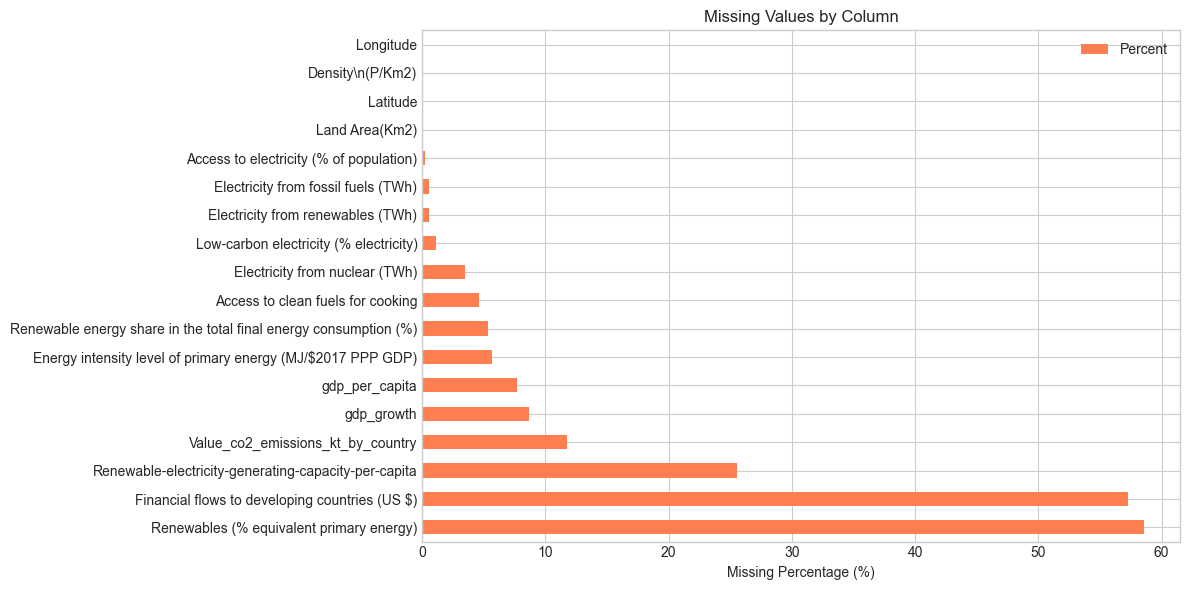

In [3]:
# Giá trị thiếu trên mỗi cột
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct}).sort_values('Percent', ascending=False)
print(missing_df[missing_df['Percent'] > 0])

# Trực quan hóa
fig, ax = plt.subplots(figsize=(12, 6))
missing_df[missing_df['Percent'] > 0].plot(kind='barh', y='Percent', ax=ax, color='coral')
ax.set_xlabel('Tỉ lệ thiếu (%)')
ax.set_title('Giá trị thiếu theo cột')
plt.tight_layout()
plt.show()

## 1.3 Phân tích Skewness

**Report Section 2.3**: Phân tích Skewness - Lý do dùng Log Transform

Top 10 Skewed Features:
Electricity from renewables (TWh)                              11.057606
Electricity from fossil fuels (TWh)                             9.396760
Value_co2_emissions_kt_by_country                               9.337673
Electricity from nuclear (TWh)                                  8.565198
Financial flows to developing countries (US $)                  8.388252
Renewable-electricity-generating-capacity-per-capita            5.366933
Land Area(Km2)                                                  4.635048
Primary energy consumption per capita (kWh/person)              2.651621
Energy intensity level of primary energy (MJ/$2017 PPP GDP)     2.589086
gdp_growth                                                      2.542058
dtype: float64


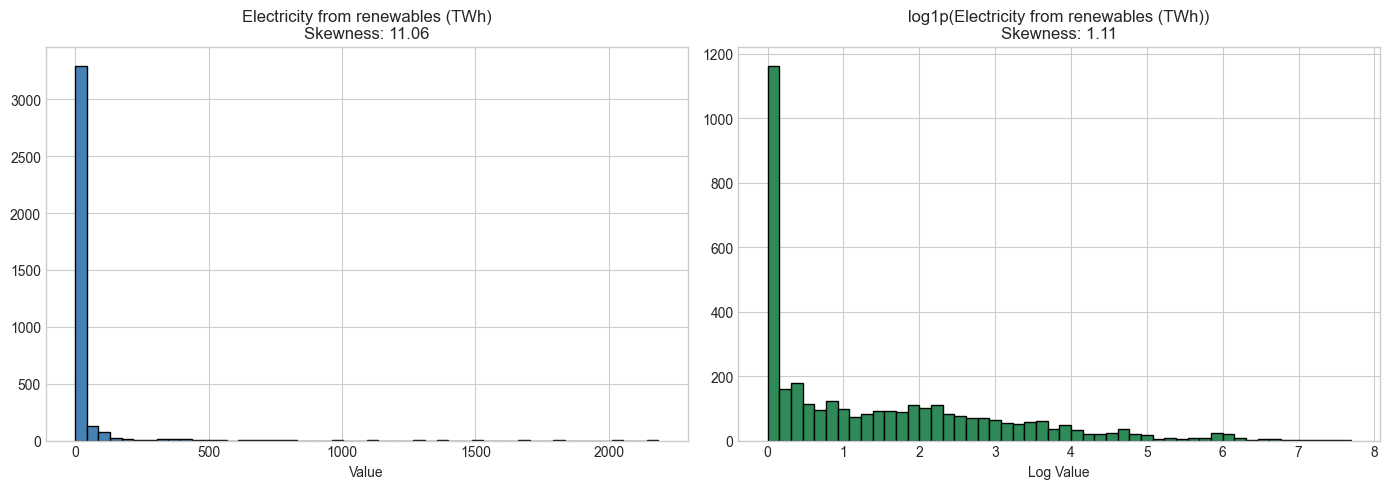

In [4]:
# Các cột dữ liệu số
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Tính độ lệch (skewness)
skewness = df[numeric_cols].skew().sort_values(key=abs, ascending=False)
print("10 đặc trưng bị lệch nhất:")
print(skewness.head(10))

# Trực quan hóa feature bị lệch nhất
top_skewed = skewness.index[0]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Trước khi log
axes[0].hist(df[top_skewed].dropna(), bins=50, color='steelblue', edgecolor='black')
axes[0].set_title(f'{top_skewed}\nSkewness: {skewness[top_skewed]:.2f}')
axes[0].set_xlabel('Giá trị')

# Sau khi log
log_values = np.log1p(df[top_skewed].dropna())
axes[1].hist(log_values, bins=50, color='seagreen', edgecolor='black')
axes[1].set_title(f'log1p({top_skewed})\nSkewness: {stats.skew(log_values):.2f}')
axes[1].set_xlabel('Giá trị Log')

plt.tight_layout()
plt.show()

## 1.4 Phân tích Outliers

**Report Section 2.4**: Phân tích Outliers - Tín hiệu vs Nhiễu

Top 10 CO2 Emitters (Avg):
Entity
China             7.636642e+06
United States     5.329539e+06
India             1.633979e+06
Japan             1.183734e+06
Germany           7.736445e+05
Canada            5.476445e+05
United Kingdom    4.706040e+05
Mexico            4.446195e+05
Indonesia         4.203340e+05
Saudi Arabia      4.162475e+05
Name: Value_co2_emissions_kt_by_country, dtype: float64


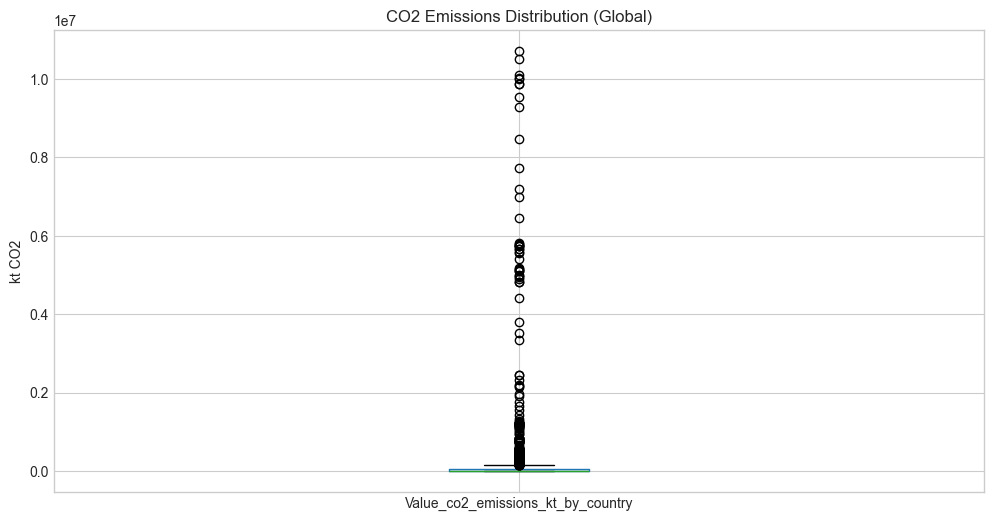


⚠️ 'Outliers' are actually major economies (China, USA, India) - NOT noise!


In [5]:
# Cột mục tiêu
target = 'Value_co2_emissions_kt_by_country'

# Top các nước phát thải
top_emitters = df.groupby('Entity')[target].mean().sort_values(ascending=False).head(10)
print("Top 10 quốc gia phát thải CO2 (Trung bình):")
print(top_emitters)

# Box plot
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(column=target, ax=ax)
ax.set_title('Phân phối phát thải CO2 (Toàn cầu)')
ax.set_ylabel('kt CO2')
plt.show()

print("\n⚠️ 'Outliers' thực ra là các nền kinh tế lớn (Trung Quốc, Mỹ, Ấn Độ) - KHÔNG phải nhiễu!")

## 1.5 Tương quan & Đa cộng tuyến (Correlation & Multicollinearity)

**Report Section 2.5**: Phân tích Đa cộng tuyến

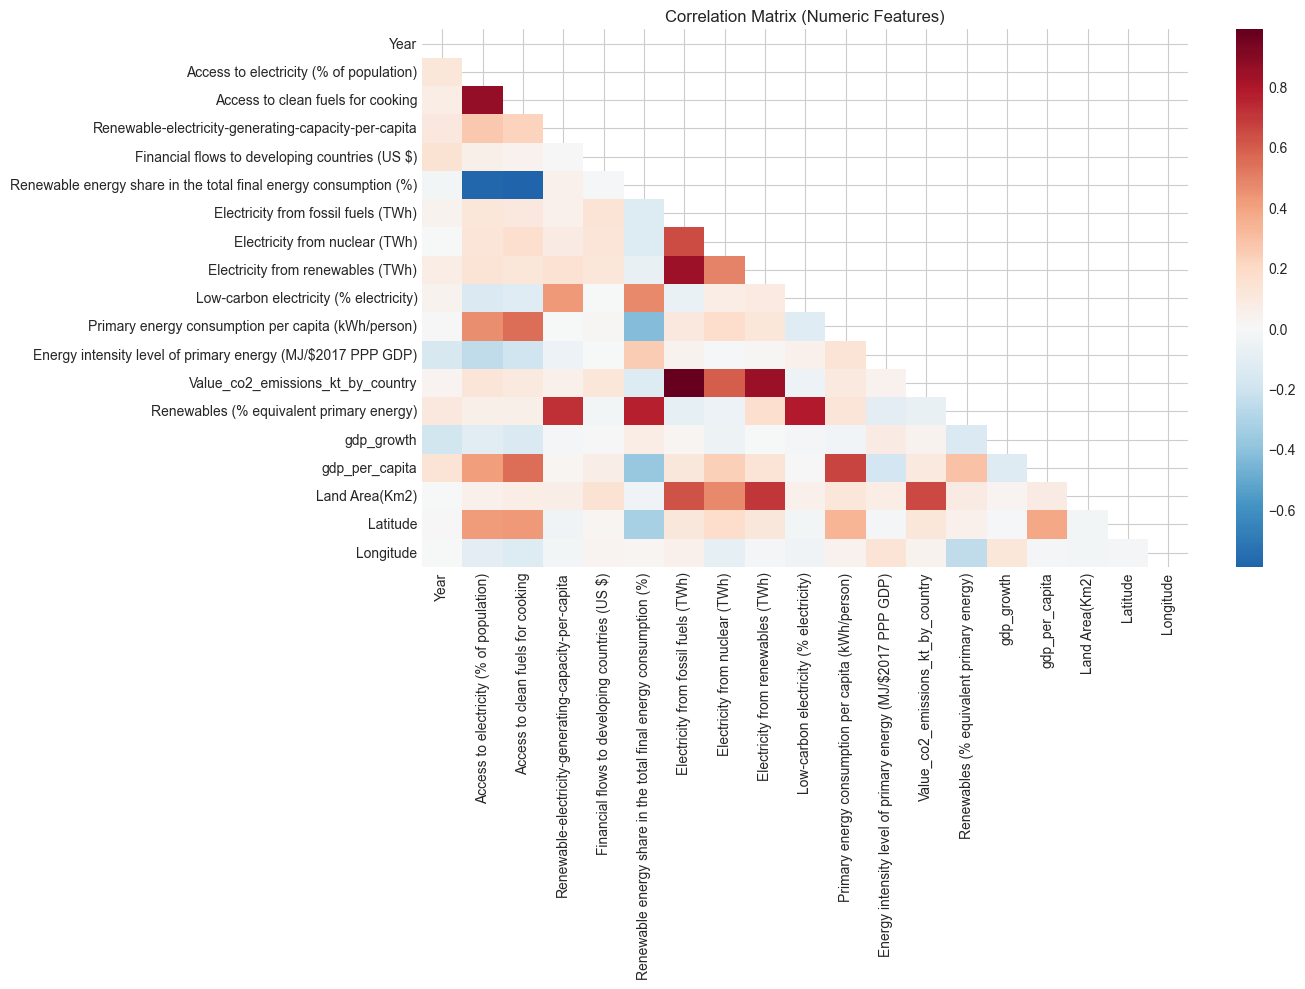


High Correlation Pairs (|r| > 0.9): 1
  Electricity from fossil fuels (TWh) <-> Value_co2_emissions_kt_by_country: r = 0.99


In [6]:
# Ma trận tương quan
corr_matrix = df[numeric_cols].corr()

# Biểu đồ nhiệt (Heatmap)
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax)
ax.set_title('Ma trận tương quan (Các đặc trưng số)')
plt.tight_layout()
plt.show()

# Các tương quan cao
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"\nCác cặp tương quan cao (|r| > 0.9): {len(high_corr)}")
for c1, c2, r in high_corr[:5]:
    print(f"  {c1} <-> {c2}: r = {r:.2f}")

## 1.6 Phân tích Chuỗi thời gian (Time Series Analysis)

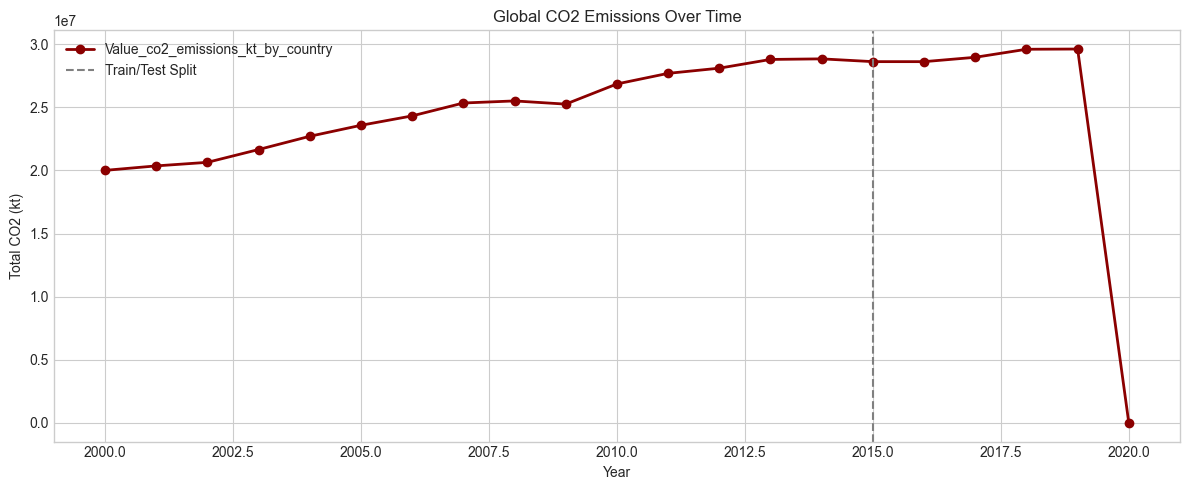


Train Period: 2001-2014
Test Period: 2015-2019


In [7]:
# Phát thải CO2 toàn cầu theo thời gian
global_co2 = df.groupby('Year')[target].sum()

fig, ax = plt.subplots(figsize=(12, 5))
global_co2.plot(ax=ax, marker='o', linewidth=2, color='darkred')
ax.axvline(x=2015, color='gray', linestyle='--', label='Điểm chia Train/Test')
ax.set_xlabel('Năm')
ax.set_ylabel('Tổng CO2 (kt)')
ax.set_title('Phát thải CO2 toàn cầu theo thời gian')
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nGiai đoạn Train: 2001-2014")
print(f"Giai đoạn Test: 2015-2019")

## Tổng kết

**Kết luận từ EDA**:
1. **Missing Values**: Cần imputation (Median)
2. **Skewness**: Một số features cần Log Transform
3. **Outliers**: Top emitters (China, USA) là signal - KHÔNG loại bỏ
4. **Multicollinearity**: Nhiều features tương quan cao - cần VIF analysis
5. **Time-Series**: Phải dùng Time-Series Split để tránh data leakage